#Сбор реальных данных  API и одной статической веб-страницы

In [111]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [112]:
url_api = "https://api.spacexdata.com/v5/launches"

response = requests.get(url_api, timeout=30)
print(response.raise_for_status() )


None


In [113]:
data_api = response.json()

In [114]:
print( type(data_api))
print(len(data_api))

<class 'list'>
205


In [162]:
url_web = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches"
response = requests.get(url_web, headers={"User-Agent": "Safari 17.6"})
print(resp.status_code)

200


#Очистка, объединение и преобразование этих наборов данных

1.api -> DataFrame


In [116]:
df_api = pd.json_normalize(data_api)

In [133]:
df_api.shape

(205, 4)

In [134]:
print(data_api[0].keys())

dict_keys(['fairings', 'links', 'static_fire_date_utc', 'static_fire_date_unix', 'net', 'window', 'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules', 'payloads', 'launchpad', 'flight_number', 'name', 'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores', 'auto_update', 'tbd', 'launch_library_id', 'id'])


In [135]:
df_api = df_api[['name', 'date_utc', 'success', 'rocket']]
df_api.head()

,name,date_utc,success,rocket
0,FalconSat,2006-03-24T22:30:00.000Z,False,5e9d0d95eda69955f709d1eb
1,DemoSat,2007-03-21T01:10:00.000Z,False,5e9d0d95eda69955f709d1eb
2,Trailblazer,2008-08-03T03:34:00.000Z,False,5e9d0d95eda69955f709d1eb
3,RatSat,2008-09-28T23:15:00.000Z,True,5e9d0d95eda69955f709d1eb
4,RazakSat,2009-07-13T03:35:00.000Z,True,5e9d0d95eda69955f709d1eb


web -> DataFrame


In [207]:
tables = pd.read_html(response.text)
print({len(tables)})


/tmp/ipython-input-483522049.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


{15}


In [208]:
df_web = tables[0]
display(df_web.head())

,Flight No.,Date and time (UTC),"Version, booster[j]",Launch site,Payload[k],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,286,"January 3, 2024 03:44[23]",F9 B5 B1082‑1,"Vandenberg, SLC‑4E",Starlink: Group 7-9 (22 satellites),"~16,800 kg (37,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
1,286,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl..."
2,287,"January 3, 2024 23:04[24]",F9 B5 B1076‑10,"Cape Canaveral, SLC‑40",Ovzon-3,"1,800 kg (4,000 lb)",GTO,Ovzon,Success,Success (LZ‑1)
3,287,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...
4,288,"January 7, 2024 22:35[28]",F9 B5 B1067‑16,"Cape Canaveral, SLC‑40",Starlink: Group 6-35 (23 satellites),"~17,100 kg (37,700 lb)",LEO,SpaceX,Success,Success (ASOG)


In [209]:
df_web.shape

(272, 10)

In [210]:
print(df_web.columns)

Index(['Flight No.', 'Date and time (UTC)', 'Version, booster[j]',
       'Launch site', 'Payload[k]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')


In [211]:
df_web = df_web[['Date and time (UTC)', 'Version, booster[j]', 'Payload[k]', 'Launch outcome']]

df_web = df_web.rename(columns={
    'Date and time (UTC)': 'date_utc',
    'Version, booster[j]': 'rocket',
    'Payload[k]': 'name',
    'Launch outcome': 'result'
})

In [212]:
display(df_web.head())

,date_utc,rocket,name,result
0,"January 3, 2024 03:44[23]",F9 B5 B1082‑1,Starlink: Group 7-9 (22 satellites),Success
1,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl..."
2,"January 3, 2024 23:04[24]",F9 B5 B1076‑10,Ovzon-3,Success
3,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...
4,"January 7, 2024 22:35[28]",F9 B5 B1067‑16,Starlink: Group 6-35 (23 satellites),Success


In [213]:

df_web = df_web.dropna(subset=['date_utc', 'name'])
df_web = df_web.drop_duplicates(subset=['date_utc', 'name'])
df_web['result'] = df_web['result'].str.strip()
df_web['rocket'] = df_web['rocket'].str.strip()


Приводим даты в один формат


In [214]:
print({df_api['date_utc'].dtype})
print({df_web['date_utc'].dtype})

{datetime64[ns, UTC]}
{dtype('O')}


In [215]:
import re
df_web = df_web[~df_web['date_utc'].str.contains('Launch of|Broadband', na=False)]


In [216]:
def parse_date(date_str):
    try:

        date_str = date_str.split('[')[0].strip()

        return pd.to_datetime(date_str)
    except:
        return pd.NaT

df_web['date_utc'] = df_web['date_utc'].apply(parse_date)
df_web['year'] = df_web['date_utc'].dt.year

In [217]:
df_web = df_web.dropna(subset=['date_utc', 'year'])


print("Web ", sorted(df_web['year'].unique())[:10])
print("API ", sorted(df_api['year'].unique())[:10])

Web  [np.float64(2024.0)]
API  [np.int32(2006), np.int32(2007), np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016)]


In [218]:

df_web['year'] = pd.to_datetime(df_web['date_utc'], errors='coerce').dt.year
df_api['year'] = pd.to_datetime(df_api['date_utc'], errors='coerce').dt.year


In [219]:
print("Web years:", sorted(df_web['date_utc'].dt.year.dropna().unique())[:10])
print("API years:", sorted(df_api['date_utc'].dt.year.dropna().unique())[:10])


Web years: [np.int32(2024)]
API years: [np.int32(2006), np.int32(2007), np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016)]


In [223]:
print("df_web:", df_web['date_utc'].dtype)
print("df_api:", df_api['date_utc'].dtype)

print("\nWikipedia:")
print(df_web['date_utc'].head(3))

print("\nAPI:")
print(df_api['date_utc'].head(3))


df_web: datetime64[ns]
df_api: datetime64[ns, UTC]

Wikipedia:
0   2024-01-03 03:44:00
2   2024-01-03 23:04:00
4   2024-01-07 22:35:00
Name: date_utc, dtype: datetime64[ns]

API:
0   2006-03-24 22:30:00+00:00
1   2007-03-21 01:10:00+00:00
2   2008-08-03 03:34:00+00:00
Name: date_utc, dtype: datetime64[ns, UTC]


In [225]:
df_api['date_utc'] = df_api['date_utc'].dt.tz_localize(None)

In [226]:
print("df_web:", df_web['date_utc'].dtype)
print("df_api:", df_api['date_utc'].dtype)

print("\nWikipedia:")
print(df_web['date_utc'].head(3))

print("\nAPI:")
print(df_api['date_utc'].head(3))

df_web: datetime64[ns]
df_api: datetime64[ns]

Wikipedia:
0   2024-01-03 03:44:00
2   2024-01-03 23:04:00
4   2024-01-07 22:35:00
Name: date_utc, dtype: datetime64[ns]

API:
0   2006-03-24 22:30:00
1   2007-03-21 01:10:00
2   2008-08-03 03:34:00
Name: date_utc, dtype: datetime64[ns]


API	   /   Web
(success	 / Launch outcome)
(rocket	  /  Version, booster[j])
(date_utc / Date and time (UTC))

In [259]:

df_api_1 = df_api[['name', 'date_utc', 'rocket', 'success']].copy()
df_api_1 = df_api_1.rename(columns={'success': 'result'})

df_web_1 = df_web[['name', 'date_utc', 'rocket', 'result']].copy()


print(df_api_1.shape, df_web_1.shape)
df_api_1.head(2), df_web_1.head(2)


(205, 4) (134, 4)


(        name            date_utc                    rocket result
 0  FalconSat 2006-03-24 22:30:00  5e9d0d95eda69955f709d1eb  False
 1    DemoSat 2007-03-21 01:10:00  5e9d0d95eda69955f709d1eb  False,
                                   name            date_utc          rocket  \
 0  Starlink: Group 7-9 (22 satellites) 2024-01-03 03:44:00   F9 B5 B1082‑1   
 2                              Ovzon-3 2024-01-03 23:04:00  F9 B5 B1076‑10   
 
     result  
 0  Success  
 2  Success  )

In [234]:

df_api_1['result'] = df_api_1['result'].replace({True: 'Success', False: 'Failure'})


API + Web


In [236]:

df_all = pd.concat([df_api_1, df_web_1], ignore_index=True)

df_all.drop_duplicates(subset=['date_utc', 'name'], inplace=True)

print( df_all.shape)
df_all.sample(5)


(339, 4)


,name,date_utc,rocket,result
326,Starlink: Group 6-70 (24 satellites),2024-12-04 10:13:00,F9 B5 B1067‑24,Success
144,Transporter-3,2022-01-13 15:25:00,5e9d0d95eda69973a809d1ec,Success
89,Starlink-4,2020-02-17 15:05:55,5e9d0d95eda69973a809d1ec,Success
19,DSCOVR,2015-02-11 23:03:00,5e9d0d95eda69973a809d1ec,Success
49,KoreaSat 5A,2017-10-30 19:34:00,5e9d0d95eda69973a809d1ec,Success


In [238]:
print("years:", sorted(df_all['date_utc'].dt.year.dropna().unique()))


years: [np.int32(2006), np.int32(2007), np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2024)]


#EDA (Exploratory Data Analysis)

Количество запусков по годам

In [239]:
launches_per_year = df_all['date_utc'].dt.year.value_counts().sort_index()


Процент успешных миссий

In [240]:
success_rate = df_all.groupby(df_all['date_utc'].dt.year)['result'].apply(
    lambda x: (x == 'Success').mean() * 100
)


Какие ракеты использовались чаще всего

In [241]:
rocket_counts = df_all['rocket'].value_counts().head(5)


#визуализаций

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

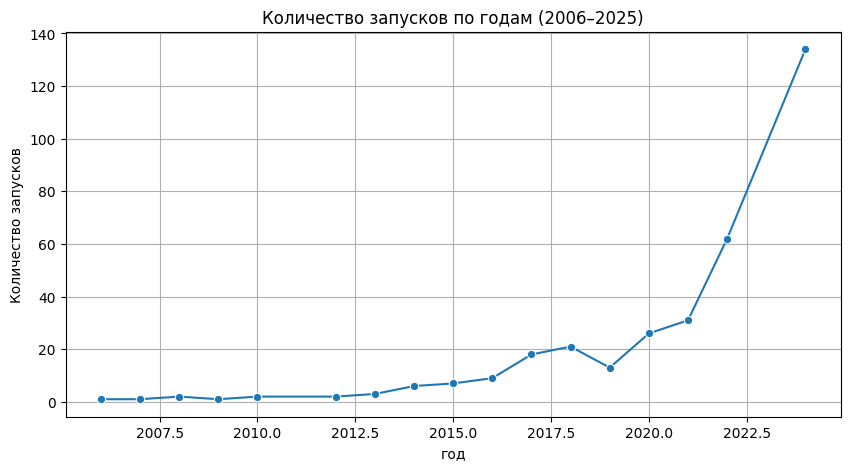

In [244]:
plt.figure(figsize=(10,5))
sns.lineplot(x=launches_per_year.index, y=launches_per_year.values, marker='o')
plt.title('Количество запусков по годам (2006–2025)')
plt.xlabel('год')
plt.ylabel('Количество запусков')
plt.grid(True)
plt.show()

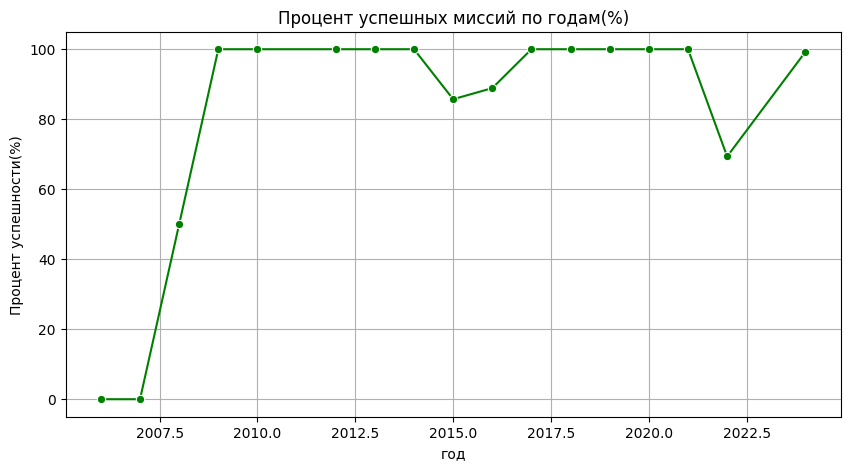

In [246]:
plt.figure(figsize=(10,5))
sns.lineplot(x=success_rate.index, y=success_rate.values, color='green', marker='o')
plt.title('Процент успешных миссий по годам(%)')
plt.xlabel('год')
plt.ylabel('Процент успешности(%)')
plt.grid(True)
plt.show()

/tmp/ipython-input-3603767026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rocket_counts.values, y=rocket_counts.index, palette='Blues_d')


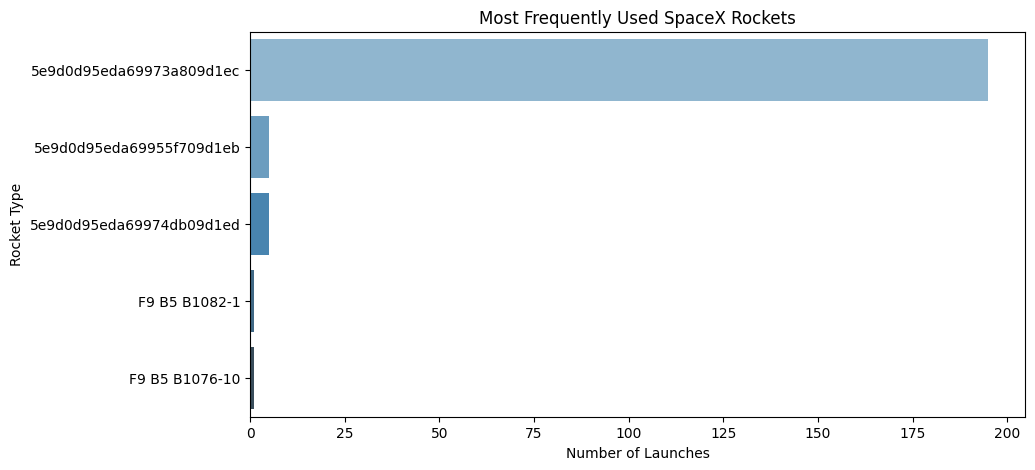

In [247]:
plt.figure(figsize=(10,5))
sns.barplot(x=rocket_counts.values, y=rocket_counts.index, palette='Blues_d')
plt.title('Most Frequently Used SpaceX Rockets')
plt.xlabel('Number of Launches')
plt.ylabel('Rocket Type')
plt.show()


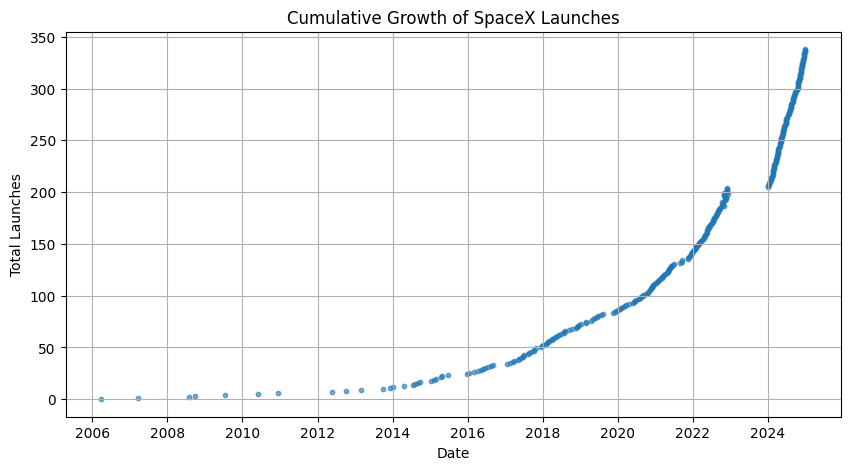

In [258]:
plt.figure(figsize=(10,5))
plt.scatter(df_all['date_utc'], range(len(df_all)), s=10, alpha=0.6)
plt.title('Cumulative Growth of SpaceX Launches')
plt.xlabel('Date')
plt.ylabel('Total Launches')
plt.grid(True)
plt.show()


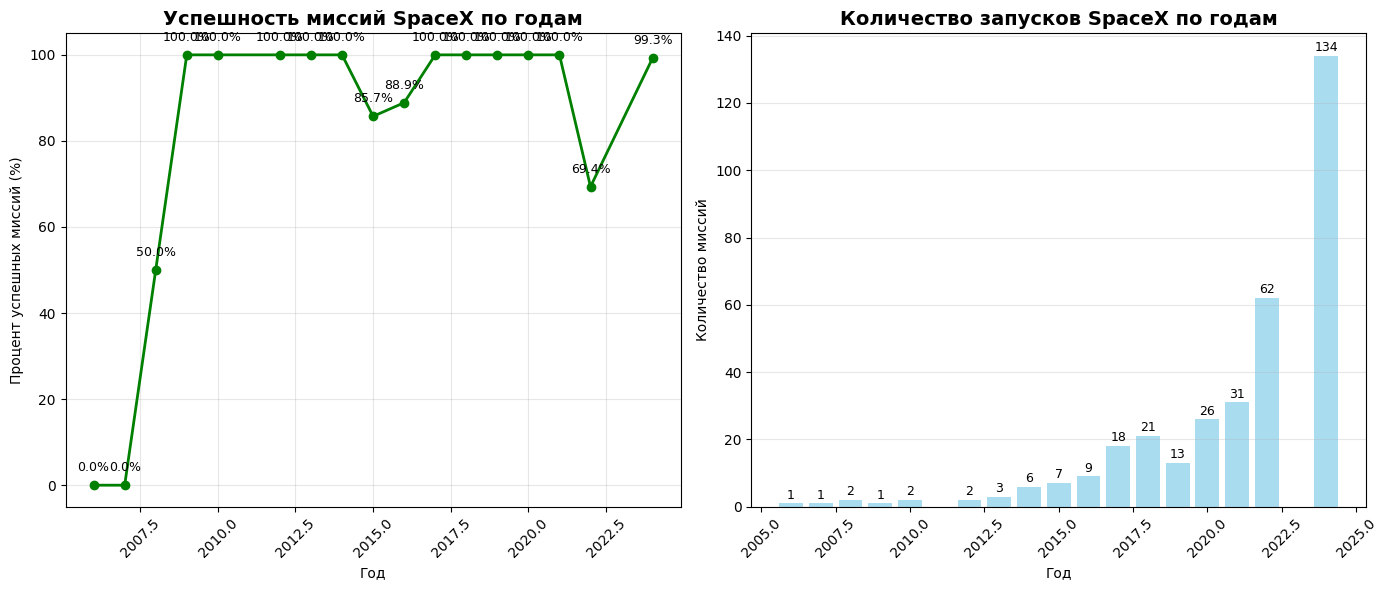

СТАТИСТИКА
2006: 1 миссий, успешность: 0.0%
2007: 1 миссий, успешность: 0.0%
2008: 2 миссий, успешность: 50.0%
2009: 1 миссий, успешность: 100.0%
2010: 2 миссий, успешность: 100.0%
2012: 2 миссий, успешность: 100.0%
2013: 3 миссий, успешность: 100.0%
2014: 6 миссий, успешность: 100.0%
2015: 7 миссий, успешность: 85.7%
2016: 9 миссий, успешность: 88.9%
2017: 18 миссий, успешность: 100.0%
2018: 21 миссий, успешность: 100.0%
2019: 13 миссий, успешность: 100.0%
2020: 26 миссий, успешность: 100.0%
2021: 31 миссий, успешность: 100.0%
2022: 62 миссий, успешность: 69.4%
2024: 134 миссий, успешность: 99.3%


In [272]:


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(yearly_success.index, yearly_success.values, marker='o', linewidth=2, color='green', markersize=6)
plt.title('Успешность миссий SpaceX по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Процент успешных миссий (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

for i, (year, success) in enumerate(zip(yearly_success.index, yearly_success.values)):
    plt.annotate(f'{success:.1f}%', (year, success),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


plt.subplot(1, 2, 2)
plt.bar(launches_per_year.index, launches_per_year.values, alpha=0.7, color='skyblue')
plt.title('Количество запусков SpaceX по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество миссий')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')


for i, (year, count) in enumerate(zip(launches_per_year.index, launches_per_year.values)):
    plt.text(year, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


print("СТАТИСТИКА")

for year in sorted(yearly_success.index):
    success_rate = yearly_success[year]
    launches_count = launches_per_year[year]
    print(f"{year}: {launches_count} миссий, успешность: {success_rate:.1f}%")